## Rotating custom tick labels

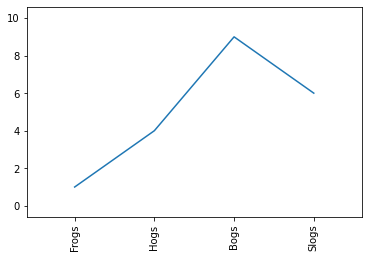

In [1]:
import matplotlib.pyplot as plt


x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

___

## Date tick labels

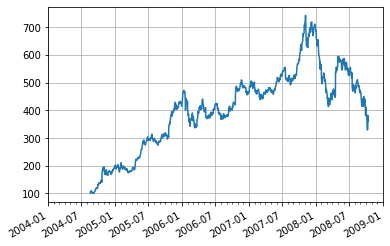

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

## Custom Figure subclasses

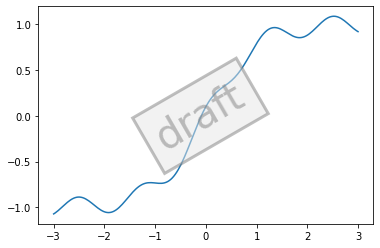

In [1]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np


class WatermarkFigure(Figure):
    """A figure with a text watermark."""

    def __init__(self, *args, watermark=None, **kwargs):
        super().__init__(*args, **kwargs)

        if watermark is not None:
            bbox = dict(boxstyle='square', lw=3, ec='gray',
                        fc=(0.9, 0.9, .9, .5), alpha=0.5)
            self.text(0.5, 0.5, watermark,
                      ha='center', va='center', rotation=30,
                      fontsize=40, color='gray', alpha=0.5, bbox=bbox)


x = np.linspace(-3, 3, 201)
y = np.tanh(x) + 0.1 * np.cos(5 * x)

plt.figure(FigureClass=WatermarkFigure, watermark='draft')
plt.plot(x, y)